In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import seaborn as sn

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape  # 28 by 28 pixel image

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train = X_train / 255
X_test = X_test / 255

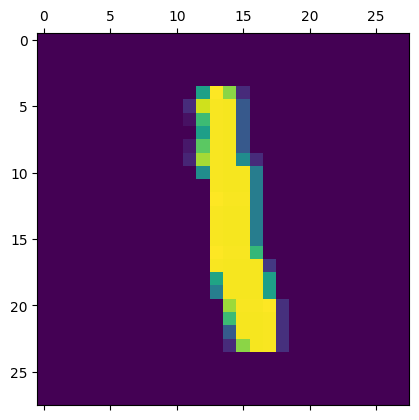

In [8]:
plt.matshow(X_train[6])

In [9]:
y_train[6]

1

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
print(f"Shape of new flattened array of Training dataset = {X_train_flattened.shape}")
print(f"Shape of new flattened array of Testing dataset = {X_test_flattened.shape}")

Shape of new flattened array of Training dataset = (60000, 784)
Shape of new flattened array of Testing dataset = (10000, 784)


## Creating Neural Network

In [12]:
model = Sequential([
    Dense(units=10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4741 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3036 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 807us/step - loss: 0.2729 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.2668 - accuracy: 0.9262


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2710 - accuracy: 0.9235


[0.2710047960281372, 0.9235000014305115]

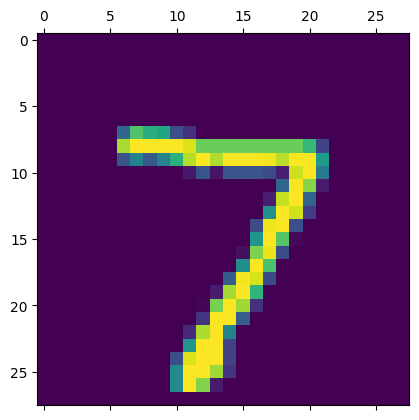

In [14]:
plt.matshow(X_test[0])

In [15]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [16]:
y_predicted[0]

array([3.9543469e-02, 5.3781224e-07, 4.4783570e-02, 9.6697146e-01,
       2.3383219e-03, 1.5518366e-01, 2.2447286e-06, 9.9984109e-01,
       9.3372509e-02, 7.5899392e-01], dtype=float32)

In [17]:
print(f"Number is = {np.argmax(y_predicted[0])}")


Number is = 7


In [18]:
# We need to convert y_predicted into int numbers

y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## How the prediction looks like

In [19]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,    9,  906,   26,    7,    6,   12,   13,   41,    5],
       [   2,    0,   12,  929,    0,   29,    2,   11,   17,    8],
       [   1,    1,    2,    1,  907,    0,   12,    4,    8,   46],
       [   8,    2,    2,   24,    7,  798,   14,    6,   24,    7],
       [  10,    3,    4,    1,    7,   14,  916,    2,    1,    0],
       [   2,    6,   20,    7,    5,    1,    0,  954,    2,   31],
       [   9,   10,    7,   34,    9,   41,    9,   12,  827,   16],
       [  11,    7,    1,   11,   21,    9,    0,   28,    2,  919]])>

Text(95.72222222222221, 0.5, 'Truth')

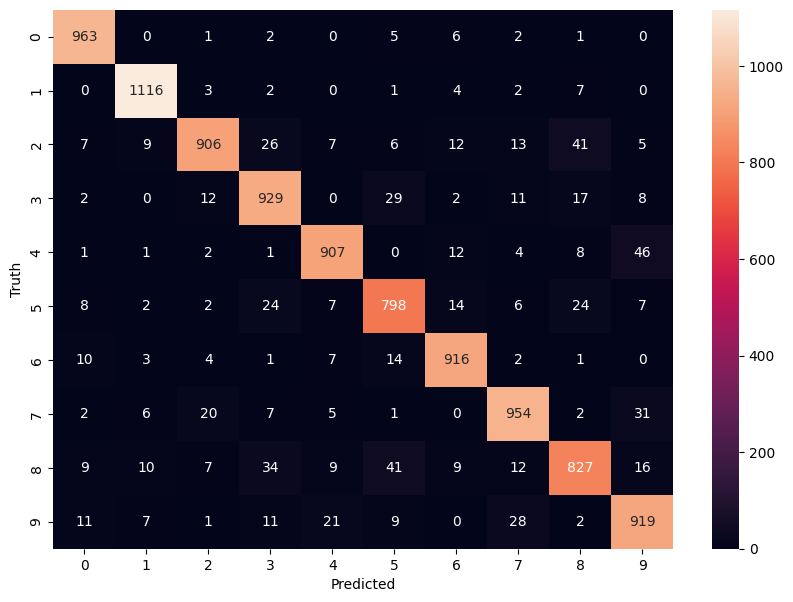

In [20]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = Sequential([
    Dense(units=100, input_shape=(784,), activation = 'relu'),
    Dense(units=20, activation = 'sigmoid'),
    Dense(units=10, activation = 'sigmoid')         # Adding neural network improves prediction 
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4793 - accuracy: 0.8959
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1478 - accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0975 - accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0562 - accuracy: 0.9844


In [40]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9746


[0.08100561797618866, 0.9746000170707703]

In [41]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

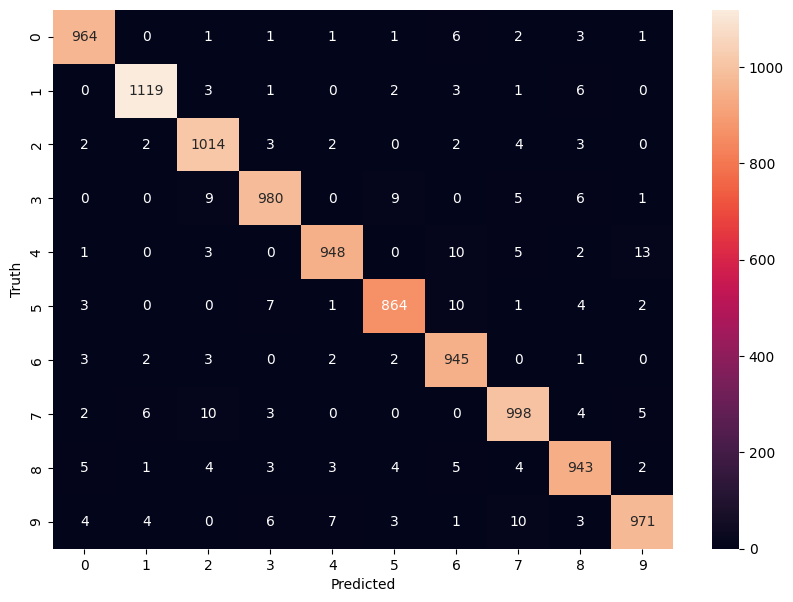

In [42]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm , annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')